In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
os.chdir('../')
os.listdir()

['main.py',
 'preprocess',
 'models',
 'notebooks',
 '.gitignore',
 '.git',
 'model_selection',
 '.idea',
 'data',
 'trasi.csv']

In [24]:
import preprocess.preprocess as prep
import model_selection.model_selection as ms

In [19]:
df = pd.read_csv('trasi.csv', index_col='index')
df.drop(columns='Unnamed: 0', inplace=True)

In [20]:
df.head()

,open,high,low,close,mon,tue,wed,thu,fri,week_1,...,o_CALL_380,o_PUT_380,o_price_distance_norm_380,o_price_distance_sign_380,o_strike_norm_380,o_settlement_norm_380,o_volume_norm_380,o_open_interest_norm_380,target,sparse_target
index,,,,,,,,,,,,,,,,,,,,,
2016-09-27,-0.058155,-0.060909,-0.065845,-0.059556,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021032,1
2016-09-28,-0.040819,-0.031007,-0.029408,-0.036702,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015292,1
2016-09-29,-0.010237,-0.010999,-0.013495,-0.012160,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.004255,0
2016-09-30,-0.028101,-0.010286,-0.028186,-0.011716,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011607,0
2016-10-03,-0.008972,-0.004708,0.001751,0.005051,1,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021899,1


In [26]:
x_train_data, x_test_data, y_train_data, y_test_data = ms.split_dataset(df, split_ratio=0.8)

(491, 5362) (123, 5362) (491, 2) (123, 2)


In [28]:
y_train_data.head()

,target,sparse_target
index,,
2016-09-27,0.021032,1
2016-09-28,0.015292,1
2016-09-29,-0.004255,0
2016-09-30,0.011607,0
2016-10-03,0.021899,1


In [29]:
from sklearn.linear_model import Lasso


In [32]:
clf = Lasso()
clf.fit(x_train_data.values, y_train_data[['sparse_target']].values)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [33]:
np.arange(0.5, 1.6, 0.1)

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4])

In [34]:
from xgboost import XGBClassifier

In [35]:
clf = XGBClassifier()
clf.fit(x_train_data.values, y_train_data[['sparse_target']].values)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [36]:
y_pred = clf.predict(x_test_data.values)

In [40]:
result = y_pred * np.reshape(y_test_data[['target']].values, (-1))

In [41]:
np.sum(result)

-0.1336779991557639

In [42]:
result

array([ 0.03508616,  0.03044658,  0.03396208,  0.04917958,  0.04363231,
        0.03585705,  0.03800259,  0.02614464, -0.00645106, -0.01318814,
       -0.02600917, -0.02318705, -0.03138278, -0.05529063, -0.06974738,
       -0.07414928, -0.08903584, -0.10015587, -0.07028491, -0.06416063,
       -0.04106932, -0.06177756, -0.07400209, -0.06221383, -0.04459367,
       -0.06279356, -0.06255781, -0.02796409, -0.02974193, -0.01284709,
       -0.03646598, -0.02080546,  0.00511381,  0.01625668,  0.        ,
        0.0247744 ,  0.05709785,  0.        ,  0.03076763,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.01645592,  0.04245999,
        0.04775225,  0.03187937,  0.00219265,  0.00144698, -0.04280667,
       -0.02920934, -0.00885998, -0.00578144, -0.01449687, -0.04733936,
       -0.        , -0.02001169, -0.00358993, -0.01839667, -0.01

In [43]:
import matplotlib.pyplot as plt

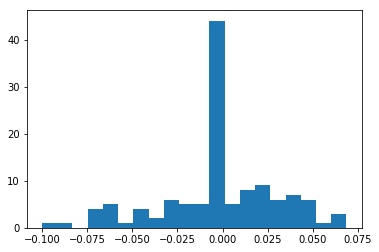

In [44]:
plt.hist(result, bins=20)
plt.show()

In [50]:
clf.predict(x_test_data.values)
ms.scoring(model=clf, x_test=x_test_data.values, y_test=y_test_data)

Detail>>>>> [ 0.03508616  0.03044658  0.03396208  0.04917958  0.04363231  0.03585705
  0.03800259  0.02614464 -0.00645106 -0.01318814 -0.02600917 -0.02318705
 -0.03138278 -0.05529063 -0.06974738 -0.07414928 -0.08903584 -0.10015587
 -0.07028491 -0.06416063 -0.04106932 -0.06177756 -0.07400209 -0.06221383
 -0.04459367 -0.06279356 -0.06255781 -0.02796409 -0.02974193 -0.01284709
 -0.03646598 -0.02080546  0.00511381  0.01625668  0.          0.0247744
  0.05709785  0.          0.03076763  0.          0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.          0.          0.          0.01645592
  0.04245999  0.04775225  0.03187937  0.00219265  0.00144698 -0.04280667
 -0.02920934 -0.00885998 -0.00578144 -0.01449687 -0.04733936 -0.
 -0.02001169 -0.00358993 -0.01839667 -0.01876739 -0.0143607  -0.03281836
  0.0376842   0.03661349  0.00740045  0.01654183 -0.00307467 -0.03241983
  0.04911348  0.06783813  0.04624801  0.04592058  0.06255963  0.

{'total_return': -0.1336779991557639,
 'precision': 0.5294117647058824,
 'coverage': 0.6910569105691057,
 'sharpe_ratio': -0.03994170404732013,
 'mean': -0.0015726823430089877,
 'std': 0.03937444284164201}